In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from SalesDataCleaner import SalesDataCleaner

In [3]:
url = 'https://raw.githubusercontent.com/FrancescoMariottini/project3/main/inputs/all_sales_data.csv'
sdc = SalesDataCleaner(url)
sdc.clean()

In [4]:
sdc_df = sdc.get_cleaned_data()

In [5]:
sdc_df

,source,postcode,house_is,property_subtype,price,rooms_number,area,equipped_kitchen_has,furnished,open_fire,terrace,terrace_area,garden,garden_area,land_surface,facades_number,swimming_pool_has,region,building_state_agg
0,6,4180,True,MIXED_USE_BUILDING,295000.0,3.0,242.0,True,False,False,True,36.0,True,1000.0,1403.0,NaN,False,W,good
1,6,8730,True,VILLA,675000.0,4.0,349.0,True,False,False,False,0.0,True,977.0,1526.0,NaN,False,F,good
2,6,4020,True,APARTMENT_BLOCK,250000.0,5.0,303.0,True,False,False,False,0.0,False,0.0,760.0,NaN,False,W,to_renovate
3,6,1200,True,HOUSE,545000.0,4.0,235.0,True,True,False,False,0.0,False,0.0,63.0,NaN,False,B,renovated
4,6,1190,True,MIXED_USE_BUILDING,500000.0,2.0,220.0,True,False,False,False,0.0,True,60.0,193.0,NaN,False,B,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45822,4,8790,False,APARTMENT,250000.0,1.0,300.0,False,False,False,False,0.0,False,0.0,0.0,2.0,False,F,good
45864,4,2018,False,APARTMENT,298000.0,1.0,71.0,True,False,False,True,12.0,False,0.0,0.0,1.0,False,F,good
45976,4,2610,False,APARTMENT,1500000.0,10.0,520.0,True,False,False,False,0.0,True,72.0,0.0,2.0,False,F,good
46189,4,2000,False,FLAT_STUDIO,150000.0,1.0,40.0,True,False,False,False,0.0,False,0.0,0.0,2.0,False,F,to_renovate


In [6]:
sdc_df['price_by_area'] = sdc_df['price'] / sdc_df['area']

In [7]:
sdc_df['price_by_area']

0        1219.008264
1        1934.097421
2         825.082508
3        2319.148936
4        2272.727273
            ...     
45822     833.333333
45864    4197.183099
45976    2884.615385
46189    3750.000000
46282    2850.112500
Name: price_by_area, Length: 11288, dtype: float64

In [8]:
def area_to_bin(area):
    if area >= 250:
        b = '250+'
    elif area >= 180:
        b = '180-250'
    elif area >= 120:
        b = '120-180'
    elif area >= 90:
        b = '90-120'
    elif area >= 60:
        b = '60-90'
    else:
        b = '0-60'
    return b

In [9]:
sdc_df['area_bin'] = sdc_df.area.map(area_to_bin)

In [10]:
sdc_df['area_bin'] = pd.Categorical(sdc_df['area_bin'], ['0-60', '60-90', '90-120', '120-180', '180-250', '250+'], ordered=True)
sdc_df['region'] = pd.Categorical(sdc_df['region'], ['B', 'F', 'W'], ordered=False)

In [11]:
sdc_df

,source,postcode,house_is,property_subtype,price,rooms_number,area,equipped_kitchen_has,furnished,open_fire,...,terrace_area,garden,garden_area,land_surface,facades_number,swimming_pool_has,region,building_state_agg,price_by_area,area_bin
0,6,4180,True,MIXED_USE_BUILDING,295000.0,3.0,242.0,True,False,False,...,36.0,True,1000.0,1403.0,NaN,False,W,good,1219.008264,180-250
1,6,8730,True,VILLA,675000.0,4.0,349.0,True,False,False,...,0.0,True,977.0,1526.0,NaN,False,F,good,1934.097421,250+
2,6,4020,True,APARTMENT_BLOCK,250000.0,5.0,303.0,True,False,False,...,0.0,False,0.0,760.0,NaN,False,W,to_renovate,825.082508,250+
3,6,1200,True,HOUSE,545000.0,4.0,235.0,True,True,False,...,0.0,False,0.0,63.0,NaN,False,B,renovated,2319.148936,180-250
4,6,1190,True,MIXED_USE_BUILDING,500000.0,2.0,220.0,True,False,False,...,0.0,True,60.0,193.0,NaN,False,B,good,2272.727273,180-250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45822,4,8790,False,APARTMENT,250000.0,1.0,300.0,False,False,False,...,0.0,False,0.0,0.0,2.0,False,F,good,833.333333,250+
45864,4,2018,False,APARTMENT,298000.0,1.0,71.0,True,False,False,...,12.0,False,0.0,0.0,1.0,False,F,good,4197.183099,60-90
45976,4,2610,False,APARTMENT,1500000.0,10.0,520.0,True,False,False,...,0.0,True,72.0,0.0,2.0,False,F,good,2884.615385,250+
46189,4,2000,False,FLAT_STUDIO,150000.0,1.0,40.0,True,False,False,...,0.0,False,0.0,0.0,2.0,False,F,to_renovate,3750.000000,0-60


In [12]:
sdc_df_b = sdc_df[sdc_df.region=='B']
sdc_df_b

,source,postcode,house_is,property_subtype,price,rooms_number,area,equipped_kitchen_has,furnished,open_fire,...,terrace_area,garden,garden_area,land_surface,facades_number,swimming_pool_has,region,building_state_agg,price_by_area,area_bin
3,6,1200,True,HOUSE,545000.0,4.0,235.0,True,True,False,...,0.0,False,0.0,63.0,NaN,False,B,renovated,2319.148936,180-250
4,6,1190,True,MIXED_USE_BUILDING,500000.0,2.0,220.0,True,False,False,...,0.0,True,60.0,193.0,NaN,False,B,good,2272.727273,180-250
7,6,1150,True,APARTMENT_BLOCK,650000.0,4.0,200.0,True,False,False,...,4.0,True,150.0,301.0,NaN,False,B,good,3250.000000,180-250
11,6,1030,True,APARTMENT_BLOCK,399000.0,3.0,137.0,True,False,False,...,10.0,False,0.0,195.0,NaN,False,B,to_renovate,2912.408759,120-180
14,6,1200,True,APARTMENT_BLOCK,1750000.0,7.0,550.0,True,False,False,...,20.0,True,60.0,270.0,NaN,False,B,good,3181.818182,250+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41602,4,1150,True,HOUSE,1895000.0,5.0,354.0,True,False,False,...,35.0,True,170.0,325.0,2.0,False,B,good,5353.107345,250+
41922,4,1190,False,APARTMENT,435000.0,2.0,113.0,True,False,False,...,10.0,False,0.0,0.0,2.0,False,B,renovated,3849.557522,NaN
42755,4,1190,False,APARTMENT,175000.0,2.0,82.0,False,False,False,...,14.0,False,0.0,0.0,4.0,False,B,to_renovate,2134.146341,60-90
42950,4,1160,False,APARTMENT,295000.0,1.0,59.0,True,False,False,...,5.0,False,0.0,0.0,4.0,False,B,good,5000.000000,0-60


In [13]:
sdc_df_f = sdc_df[sdc_df.region=='F']
sdc_df_f

,source,postcode,house_is,property_subtype,price,rooms_number,area,equipped_kitchen_has,furnished,open_fire,...,terrace_area,garden,garden_area,land_surface,facades_number,swimming_pool_has,region,building_state_agg,price_by_area,area_bin
1,6,8730,True,VILLA,675000.0,4.0,349.0,True,False,False,...,0.0,True,977.0,1526.0,NaN,False,F,good,1934.097421,250+
10,6,9600,True,APARTMENT_BLOCK,389000.0,6.0,255.0,True,False,False,...,22.0,False,0.0,205.0,NaN,False,F,good,1525.490196,250+
15,6,3270,True,APARTMENT_BLOCK,198000.0,3.0,210.0,True,False,False,...,0.0,False,0.0,119.0,NaN,False,F,to_renovate,942.857143,180-250
17,6,9290,True,MIXED_USE_BUILDING,445000.0,4.0,307.0,True,False,False,...,16.0,False,0.0,200.0,NaN,False,F,good,1449.511401,250+
18,6,8000,True,MANSION,659000.0,3.0,232.0,True,False,True,...,20.0,False,0.0,125.0,NaN,False,F,renovated,2840.517241,180-250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45822,4,8790,False,APARTMENT,250000.0,1.0,300.0,False,False,False,...,0.0,False,0.0,0.0,2.0,False,F,good,833.333333,250+
45864,4,2018,False,APARTMENT,298000.0,1.0,71.0,True,False,False,...,12.0,False,0.0,0.0,1.0,False,F,good,4197.183099,60-90
45976,4,2610,False,APARTMENT,1500000.0,10.0,520.0,True,False,False,...,0.0,True,72.0,0.0,2.0,False,F,good,2884.615385,250+
46189,4,2000,False,FLAT_STUDIO,150000.0,1.0,40.0,True,False,False,...,0.0,False,0.0,0.0,2.0,False,F,to_renovate,3750.000000,0-60


In [14]:
sdc_df_w = sdc_df[sdc_df.region=='W']
sdc_df_w

,source,postcode,house_is,property_subtype,price,rooms_number,area,equipped_kitchen_has,furnished,open_fire,...,terrace_area,garden,garden_area,land_surface,facades_number,swimming_pool_has,region,building_state_agg,price_by_area,area_bin
0,6,4180,True,MIXED_USE_BUILDING,295000.0,3.0,242.0,True,False,False,...,36.0,True,1000.0,1403.0,NaN,False,W,good,1219.008264,180-250
2,6,4020,True,APARTMENT_BLOCK,250000.0,5.0,303.0,True,False,False,...,0.0,False,0.0,760.0,NaN,False,W,to_renovate,825.082508,250+
5,6,4040,True,HOUSE,189000.0,3.0,200.0,True,False,False,...,0.0,True,40.0,100.0,NaN,False,W,to_renovate,945.000000,180-250
6,6,4540,True,MIXED_USE_BUILDING,465000.0,4.0,400.0,True,False,False,...,0.0,False,0.0,312.0,NaN,False,W,good,1162.500000,250+
8,6,6870,True,MIXED_USE_BUILDING,89000.0,3.0,180.0,True,False,False,...,0.0,False,0.0,96.0,NaN,False,W,to_renovate,494.444444,180-250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40625,4,7910,True,HOUSE,290000.0,3.0,153.0,True,False,False,...,32.0,True,500.0,707.0,2.0,False,W,good,1895.424837,120-180
41169,4,1325,True,EXCEPTIONAL_PROPERTY,699000.0,4.0,275.0,True,False,False,...,20.0,True,2219.0,2219.0,4.0,False,W,renovated,2541.818182,250+
43561,4,1400,False,APARTMENT,185000.0,2.0,82.0,True,False,False,...,0.0,False,0.0,0.0,2.0,False,W,to_renovate,2256.097561,60-90
45548,4,6000,False,APARTMENT,99000.0,2.0,91.0,True,False,False,...,0.0,False,0.0,0.0,2.0,False,W,to_renovate,1087.912088,NaN


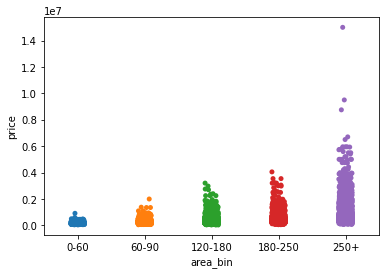

In [15]:
sns.stripplot(x='area_bin', y='price', data=sdc_df)

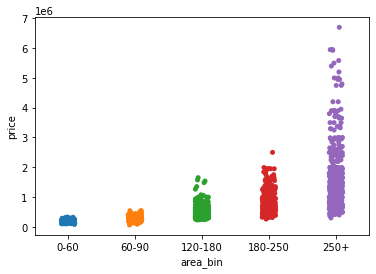

In [16]:
sns.stripplot(x='area_bin', y='price', data=sdc_df_b)

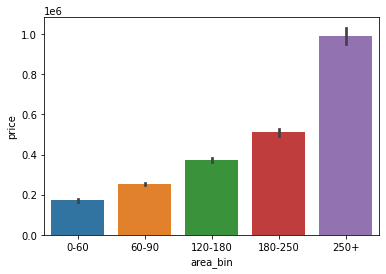

In [17]:
sns.barplot(x='area_bin', y='price', data=sdc_df, estimator=np.mean)

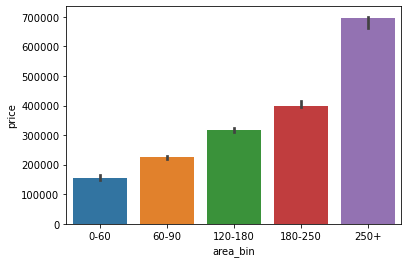

In [18]:
sns.barplot(x='area_bin', y='price', data=sdc_df, estimator=np.median)

In [19]:
sdc_df.groupby(by='area_bin')

In [20]:
sdc_df.groupby(by='area_bin').price_by_area.mean()

area_bin
0-60       4313.922720
60-90      3351.570679
120-180    2580.797438
180-250    2450.344433
250+       2356.318539
Name: price_by_area, dtype: float64

In [21]:
sdc_df.groupby(by='area_bin')[['price_by_area']].mean()

,price_by_area
area_bin,
0-60,4313.922720
60-90,3351.570679
120-180,2580.797438
180-250,2450.344433
250+,2356.318539


In [22]:
sdc_df.groupby(by='area_bin')[['price_by_area']].median().sort_values(by='area_bin')

,price_by_area
area_bin,
0-60,3613.636364
60-90,2932.666667
120-180,2167.184265
180-250,1939.714715
250+,1938.327828


In [23]:
sdc_df.dtypes

source                     int64
postcode                  object
house_is                    bool
property_subtype          object
price                    float64
rooms_number             float64
area                     float64
equipped_kitchen_has      object
furnished                 object
open_fire                 object
terrace                   object
terrace_area             float64
garden                    object
garden_area              float64
land_surface             float64
facades_number           float64
swimming_pool_has         object
region                  category
building_state_agg        object
price_by_area            float64
area_bin                category
dtype: object

In [24]:
sdc_df.dtypes

source                     int64
postcode                  object
house_is                    bool
property_subtype          object
price                    float64
rooms_number             float64
area                     float64
equipped_kitchen_has      object
furnished                 object
open_fire                 object
terrace                   object
terrace_area             float64
garden                    object
garden_area              float64
land_surface             float64
facades_number           float64
swimming_pool_has         object
region                  category
building_state_agg        object
price_by_area            float64
area_bin                category
dtype: object

In [26]:
sdc_df.groupby(by='area_bin')[['price_by_area']].median().sort_values(by='area_bin')

,price_by_area
area_bin,
0-60,3613.636364
60-90,2932.666667
120-180,2167.184265
180-250,1939.714715
250+,1938.327828


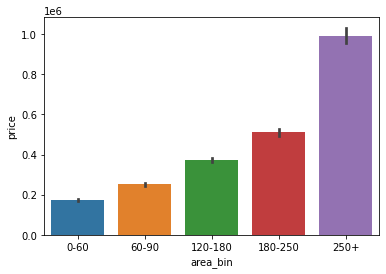

In [27]:
sns.barplot(x='area_bin', y='price', data=sdc_df, estimator=np.mean)

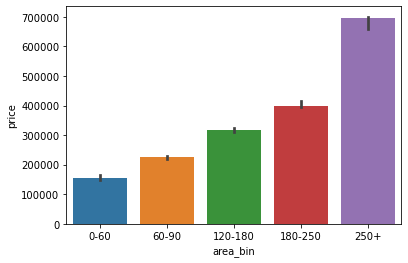

In [28]:
sns.barplot(x='area_bin', y='price', data=sdc_df, estimator=np.median)

In [29]:
sdc_df.area_bin

0        180-250
1           250+
2           250+
3        180-250
4        180-250
          ...   
45822       250+
45864      60-90
45976       250+
46189       0-60
46282      60-90
Name: area_bin, Length: 11288, dtype: category
Categories (5, object): [0-60 < 60-90 < 120-180 < 180-250 < 250+]

In [30]:
sdc_df.region

0        W
1        F
2        W
3        B
4        B
        ..
45822    F
45864    F
45976    F
46189    F
46282    F
Name: region, Length: 11288, dtype: category
Categories (3, object): [B, F, W]

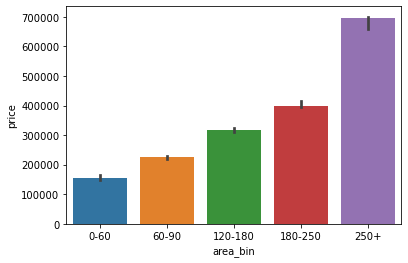

In [31]:
sns.barplot(x='area_bin', y='price', data=sdc_df, estimator=np.median)

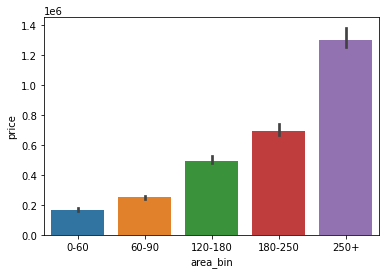

In [32]:
sns.barplot(x=sdc_df.area_bin[sdc_df.region=='B'], y=sdc_df.price[sdc_df.region=='B'], estimator=np.median)

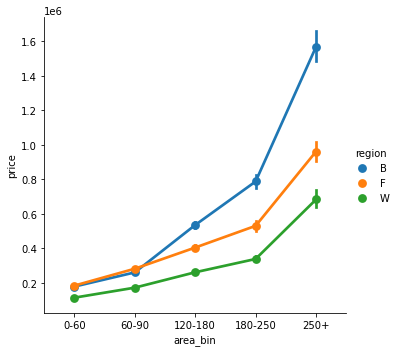

In [33]:
sns.factorplot(x='area_bin', y='price', data=sdc_df, hue='region', kin='bar')

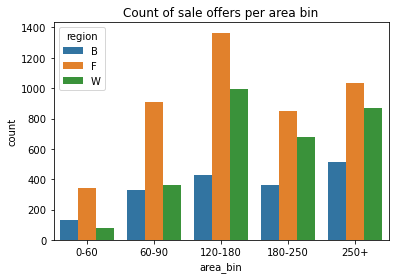

In [34]:
plot_count = sns.countplot('area_bin', data=sdc_df, hue = 'region')
plt.title('Count of sale offers per area bin')
plot_count.figure.savefig("count_per_area_bin.png")

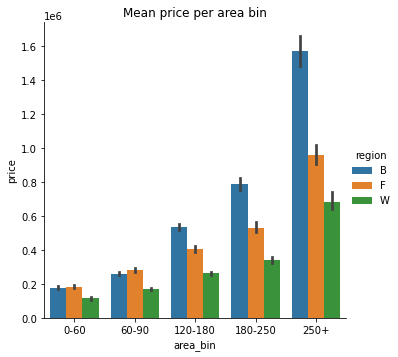

In [35]:
plot_mean = sns.factorplot(x='area_bin', y='price', data=sdc_df, hue='region', kind='bar', estimator=np.mean)
plt.title('Mean price per area bin')
plot_mean.savefig("mean_price_per_area_bin.png")

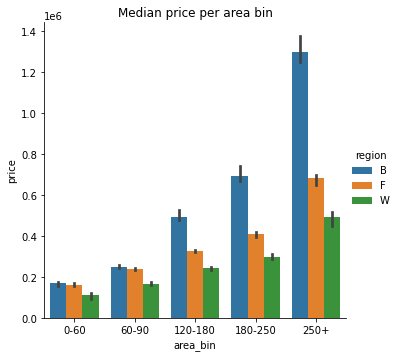

In [36]:
plot_median = sns.factorplot(x='area_bin', y='price', data=sdc_df, hue='region', kind='bar', estimator=np.median)
plt.title('Median price per area bin')
plot_median.savefig("median_price_per_area_bin.png")

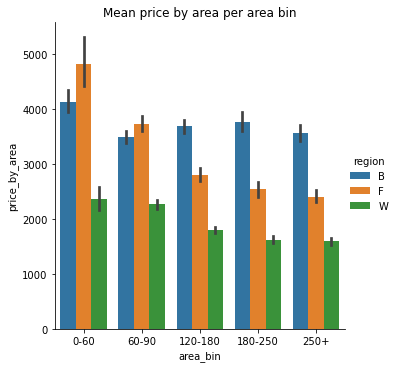

In [37]:
plot_mean_by_area = sns.factorplot(x='area_bin', y='price_by_area', data=sdc_df, hue='region', kind='bar', estimator=np.mean)
plt.title('Mean price by area per area bin')
plot_mean_by_area.savefig("mean_price_by_area_per_area_bin.png")

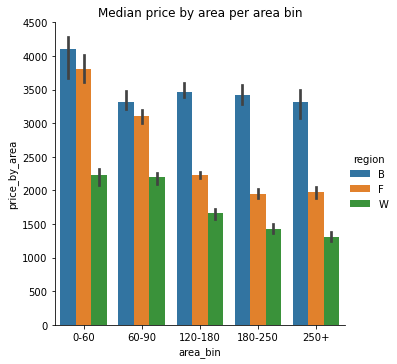

In [38]:
plot_median_by_area = sns.factorplot(x='area_bin', y='price_by_area', data=sdc_df, hue='region', kind='bar', estimator=np.median)
plt.title('Median price by area per area bin')
plot_median_by_area.savefig("median_price_by_area_per_area_bin.png")

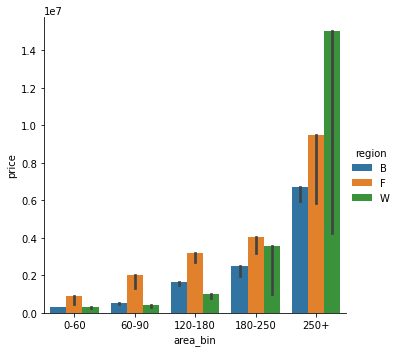

In [39]:
plot_mean = sns.factorplot(x='area_bin', y='price', data=sdc_df, hue='region', kind='bar', estimator=np.max)

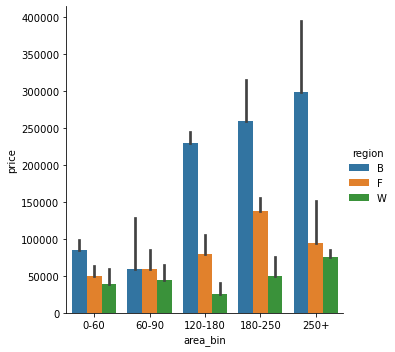

In [40]:
plot_mean = sns.factorplot(x='area_bin', y='price', data=sdc_df, hue='region', kind='bar', estimator=np.min)

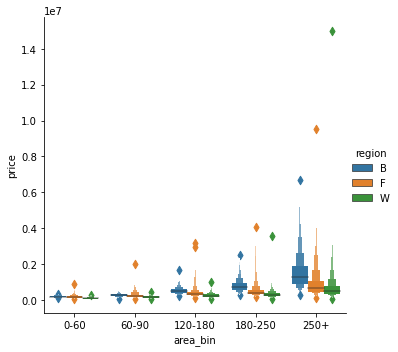

In [41]:
plot_mean = sns.factorplot(x='area_bin', y='price', data=sdc_df, hue='region', kind='boxen')